In [52]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
# from haloclustering.data import get_combined_dataset
from scipy.stats import binned_statistic
from haloclustering import models
from haloclustering import data as datamodule
from casbah import cgm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### read in data

In [60]:
cgmsqfile = "/Users/mwilde/python/cgm-squared/cgmsquared/data/cgm/cgmsquared_cgmsurvey_aodm_vhalos10_3sigma.json"
casdir = "/Users/mwilde/Dropbox/CASBaH/data/h1_galaxies_20Mpc_500kms_*.fits"
data_lo = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=0, M_max=9.204)
data_mid = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=9.204, M_max=9.888)
data_hi = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=9.888, M_max=17.)
data = datamodule.get_combined_dataset(cgmsqfile, casdir)

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 479
misses 1698
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 85
misses 103
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 520
misses 2096
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 92
misses 93
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 428
misses 1797
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 91
misses 96
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Cu

In [61]:
# instantiate the model
model = models.Model2h(data=data)

In [62]:
# read in the params from the sampler
two_halo_5mpc_sampler_file = '/Users/mwilde/python/haloclustering/haloclustering/notebooks/two-halo-only/model_2h_only_5Mpc_sampler.pkl'
sampler = datamodule.get_sampler_pickle_file(two_halo_5mpc_sampler_file)
discard = 1000
flat_samples = sampler.get_chain(discard=discard, thin=1, flat=True)

### do we want to show a sample of parameters, $\theta$ or sample for the galaxies?

In [134]:
# model data covering fraction

# take the median of the sample of parameters (maybe not a great idea given r0 distribution)
params = np.median(flat_samples, axis=0)
model.set_params(params)
fc = model.phit_sum()
bins = np.arange(0, 7, 0.1)
r_com = data[1]
fc_mod_bin, _,_ = binned_statistic(r_com, fc, statistic="median", bins=bins)
fc_mod_bin_low, _,_ = binned_statistic(r_com, fc, statistic=lambda x: np.quantile(x, 0.16), bins=bins)
fc_mod_bin_high, _,_ = binned_statistic(r_com, fc, statistic=lambda x: np.quantile(x, 0.84), bins=bins)

In [146]:
fc_mod_bin_high

array([0.97100857, 0.83460419, 0.71851013, 0.66806309, 0.58789208,
       0.56532163, 0.52989136, 0.51591707, 0.49217853, 0.4840014 ,
       0.44129373, 0.42600463, 0.39431956, 0.38593441, 0.36858947,
       0.33752922, 0.32492993, 0.33411484, 0.30900281, 0.28618906,
       0.29977766, 0.28387489, 0.27199492, 0.26034193, 0.24807144,
       0.25072772, 0.26544695, 0.2536344 , 0.24341448, 0.25331962,
       0.25066523, 0.25343607, 0.24799787, 0.2412472 , 0.24972045,
       0.230945  , 0.23578265, 0.24355119, 0.24328863, 0.24040785,
       0.23181195, 0.23184223, 0.23248657, 0.22343941, 0.23584701,
       0.23848764, 0.22837367, 0.21579049, 0.21625335, 0.22212518,
       0.22448834, 0.21083975, 0.22212767, 0.21945405, 0.21422649,
       0.22975376, 0.21140628, 0.21350936, 0.23034748, 0.22342829,
       0.21816811, 0.22471613, 0.21054679, 0.2292831 , 0.22702126,
       0.22222654, 0.22520711, 0.2213857 , 0.22630746])

In [145]:
fc_mod_bin

array([0.92449257, 0.77277143, 0.61749879, 0.57335146, 0.51046588,
       0.46596443, 0.46489151, 0.43576528, 0.4031952 , 0.37481862,
       0.33659191, 0.30627642, 0.29448825, 0.27154462, 0.26097929,
       0.24416831, 0.24050344, 0.2211718 , 0.22511718, 0.22383541,
       0.22723705, 0.21043646, 0.21961635, 0.2040976 , 0.20168332,
       0.1960762 , 0.19316797, 0.19825824, 0.19600812, 0.19736001,
       0.19021286, 0.19823286, 0.19272852, 0.18358783, 0.18246022,
       0.18011902, 0.18275783, 0.18807436, 0.199681  , 0.18974355,
       0.1776217 , 0.18325345, 0.17371783, 0.17283609, 0.17138936,
       0.17755544, 0.18305566, 0.1682971 , 0.17000846, 0.17395992,
       0.17184858, 0.1748492 , 0.17966159, 0.17727447, 0.18830441,
       0.18059582, 0.16804073, 0.18120169, 0.18422409, 0.18206498,
       0.16928596, 0.17288953, 0.17452551, 0.18460939, 0.17996957,
       0.18240472, 0.17426961, 0.17715734, 0.16834286])

In [135]:
# empirical data covering fraction
dataobj = data[-2]
ion = 'HI'
thresh = 14.0
attr = 'rho_com'
cf,lolim,uplim = cgm.cov_frac(dataobj,ion,thresh=thresh,attr=attr,bins=bins)

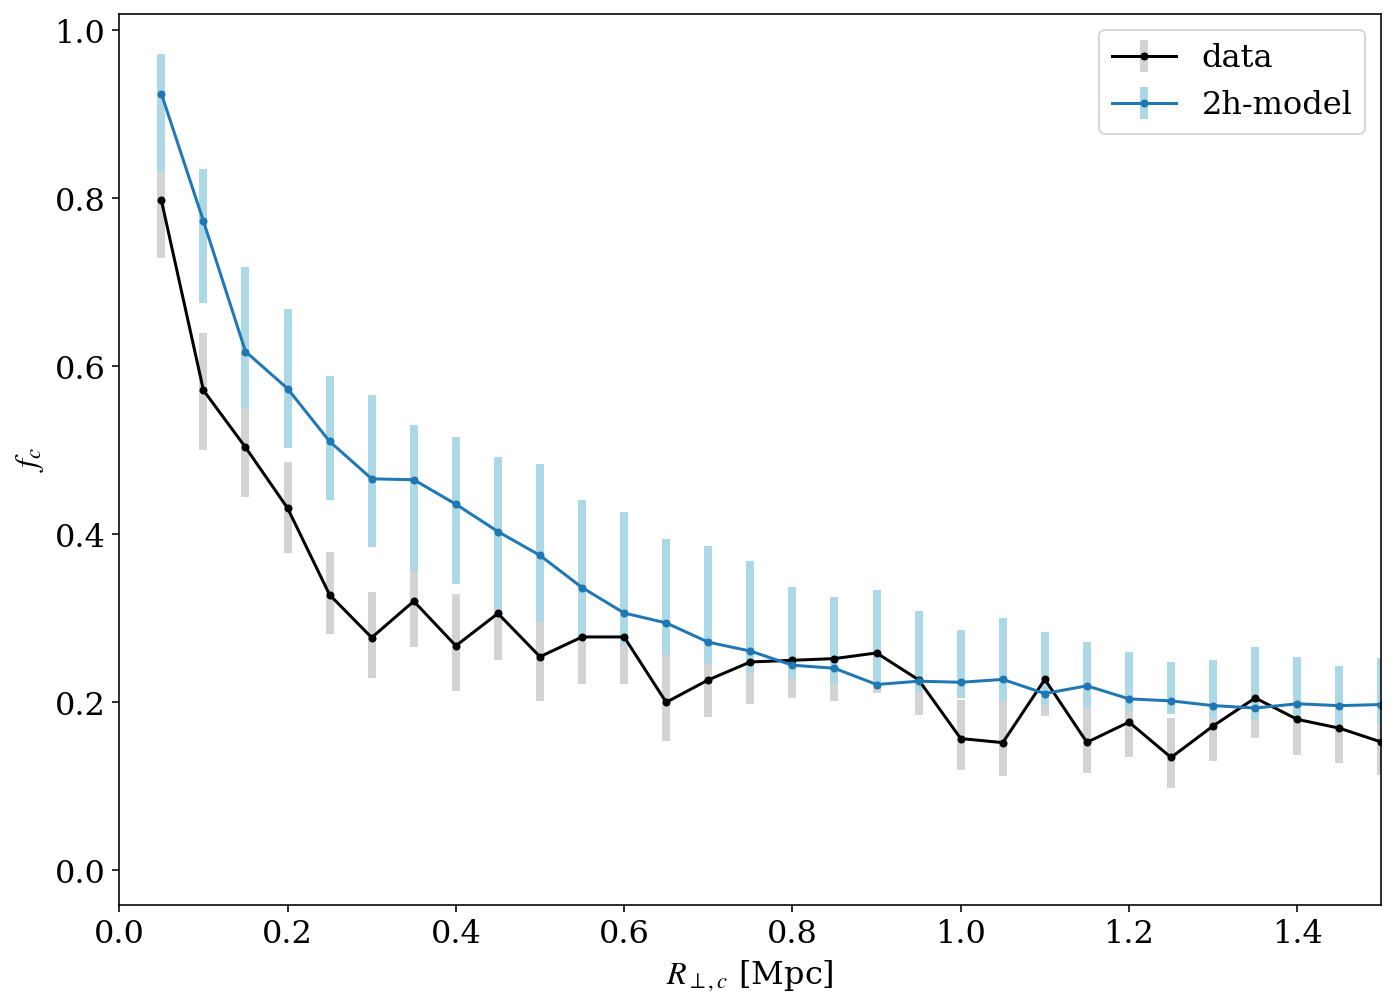

In [156]:
import matplotlib
matplotlib.rcParams['font.serif'] = "DejaVu Serif"
matplotlib.rcParams['font.family'] = "serif"

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 16
np.random.seed(42)


plt.figure(figsize=(10,7))
bincenters = (bins[:1] + bins[1:])/2
plt.errorbar(bincenters, cf, yerr=[lolim, uplim], marker='.', color='black', #fmt='.k',
ecolor='lightgrey', elinewidth=4, capsize=0, label='data')

plt.errorbar(bincenters, fc_mod_bin, yerr=[fc_mod_bin - fc_mod_bin_low, fc_mod_bin_high - fc_mod_bin], marker='.', color='tab:blue',
ecolor='lightblue', elinewidth=4, capsize=0, label='2h-model')

plt.xlim(0, 1.5)
plt.legend()
plt.ylabel(r'$f_c$');
plt.tight_layout()
plt.xlabel(r'$R_{\perp,c}$ [Mpc]');

# try out seaborn